# Inspect data

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set max rows displayed to 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [13]:
# load the data into pandas dataframes
scores = pd.read_csv('data/train_scores.csv')
train = pd.read_csv('data/train_logs.csv')
test = pd.read_csv('data/test_logs.csv')

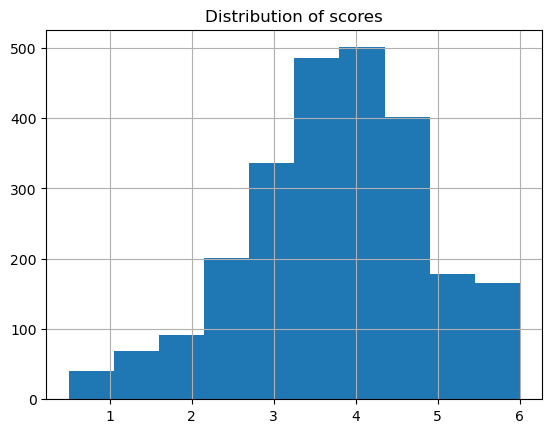

In [3]:
plt.title('Distribution of scores')
scores['score'].hist();

In [4]:
scores['score'].describe()

count    2471.000000
mean        3.711251
std         1.024937
min         0.500000
25%         3.000000
50%         4.000000
75%         4.500000
max         6.000000
Name: score, dtype: float64

In [5]:
train.head(2)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0


In [6]:
test.head(2)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0


In [7]:
train.id.nunique()

2471

- 2471 total writers

In [10]:
train['activity'].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]',
       'Move From [669, 847] To [565, 743]',
       'Move From [1041, 1121] To [1496, 1576]',
       'Move From [1455, 1557] To [1323, 1425]',
       'Move From [2268, 2275] To [2247, 2254]',
       'Move From [213, 302] To [902, 991]',
       'Move From [0, 158] To [234, 392]',
       'Move From [460, 465] To [925, 930]',
       'Move From [810, 906] To [816, 912]',
       'Move From [186, 187] To [184, 185]',
       'Move From [140, 272] To [299, 431]',
       'Move From [114, 140] To [272, 298]',
       'Move From [1386, 1450] To [1445, 1509]',
       'Move From [442, 524] To [296, 378]',
       'Move From [408, 414] To [390, 396]',
       'Move From [1144, 1147] To [1142, 1145]',
       'Move 

In [14]:
# if activity column contains 'Move', set that value to 'Move'
train.loc[train['activity'].str.contains('Move'), 'activity'] = 'Move'

In [15]:
train['activity'].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace', 'Move', 'Paste'],
      dtype=object)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [18]:
# look at nulls in train
train.isnull().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

In [21]:
train.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

In [41]:
train['down_event'].nunique()

131

In [40]:
train['up_event'].nunique()

130

In [42]:
# where down and up event differ
train[train['down_event'] != train['up_event']]

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
5115,0042269b,105,104507,104617,110,Replace,q,m,qqqqqqq qqq qqqq qqqq qqqq qq qqqqqqqq qqqqqqq...,1,4
5232,0042269b,222,158578,158638,60,Replace,q,i,qqqqqqq => q,15,14
6276,0042269b,1266,473329,473439,110,Replace,q,o,qqq qq qqq qqqqqqq qqqqqq qqqq qq => q,194,128
6825,0042269b,1815,641821,641920,99,Replace,q,t,qqq qqqqq qq qqqqqqqq qqqq qqq qqqqqqq qq qqqq...,529,190
8223,0042269b,3213,1410198,1410293,95,Replace,q,a,qqqqqqq qqqqqqqqq qqqq qqq qq qqqq qqq qqqqqqq...,1539,282
...,...,...,...,...,...,...,...,...,...,...,...
8323360,fde20dd8,2019,495093,495205,112,Replace,q,i,qqqq => q,530,167
8328686,fde20dd8,7345,1760415,1760572,157,Replace,q,y,qq qqq qqq'q qqqqq qqqqqq qq qqq qqqqqqq => q,3218,700
8378372,ff90a677,29,50477,50647,170,Nonproduction,a,A,NoChange,18,4
8378374,ff90a677,31,50703,50837,134,Replace,q,i,q qq qqqqqqq qqqq => q,1,1


# Create feature df

### Features that may determine the Quality of an Essay:

- Total keys
- Word count
- tot keys / word count (keys pressed per word)
- avg action time
- std action time
- proportion of each of the 6 actions

In [76]:
# group users by id
grouped = train.groupby('id')

# Calculate summary statistics for each user
features = grouped.agg({
    'down_time': ['sum', 'mean', 'std', 'min', 'max'],  # Total, average, standard deviation, min, and max of down time
    'up_time': ['sum', 'mean', 'std', 'min', 'max'],    # Total, average, standard deviation, min, and max of up time
    'action_time': ['sum', 'mean', 'std', 'min', 'max'],# Total, average, standard deviation, min, and max of action time
    'id': 'count'                                       # Total number of events (key presses)
})

# Flatten the multi-level columns
features.columns = ['_'.join(col).strip() for col in features.columns.values]

# Reset index to make 'id' a column again
features.reset_index(inplace=True)

In [77]:
# group by user and take the last 'word_count' value
last_word_count = train.groupby('id')['word_count'].last().reset_index()

# add to features df
features = features.merge(last_word_count, on='id', how='left')

In [78]:
# add col keys_per_word by dividing id_count by word_count
features['keys_per_word'] = features['id_count'] / features['word_count']

In [82]:
# Calculate the count of each activity type per user
activity_counts = train.pivot_table(index='id', columns='activity', aggfunc='size', fill_value=0).reset_index()

# Now, calculate the percentages by dividing each activity count by the total count of activities (id_count)
activity_percentages = activity_counts.iloc[:, 1:].div(features['id_count'], axis=0)

# Rename the columns to reflect that these are percentages
activity_percentages.columns = [str(col) + '_percent' for col in activity_percentages.columns]

# add the activity percentages to the features dataframe
features = pd.concat([features, activity_percentages], axis=1)

In [90]:
# add essay scores
features = features.merge(scores, on='id', how='left')

In [91]:
features

,id,down_time_sum,down_time_mean,down_time_std,down_time_min,down_time_max,up_time_sum,up_time_mean,up_time_std,up_time_min,up_time_max,action_time_sum,action_time_mean,action_time_std,action_time_min,action_time_max,id_count,word_count,keys_per_word,Input_percent,Move_percent,Nonproduction_percent,Paste_percent,Remove/Cut_percent,Replace_percent,score
0,001519c8,2168798234,8.481808e+05,395112.665961,4526,1801877,2169095477,8.482970e+05,395105.685655,4557,1801969,297243,116.246774,91.797374,0,2259,2557,255,10.027451,0.786077,0.001173,0.046930,0.000000,0.163082,0.002738,3.5
1,0022f953,1273271023,5.188553e+05,384959.404177,30623,1788842,1273546414,5.189676e+05,384952.728796,30853,1788969,275391,112.221271,55.431189,0,1758,2454,320,7.668750,0.789731,0.000000,0.103504,0.000407,0.105949,0.000407,3.5
2,0042269b,3426641982,8.284918e+05,489500.796565,4441,1771219,3427063183,8.285936e+05,489500.438784,4540,1771669,421201,101.837766,82.383766,0,3005,4136,404,10.237624,0.849855,0.000000,0.042311,0.000000,0.106141,0.001692,6.0
3,0059420b,1222211589,7.854830e+05,385205.014399,41395,1404394,1222401185,7.856049e+05,385206.081250,41513,1404469,189596,121.848329,113.768226,0,806,1556,206,7.553398,0.838046,0.000000,0.063625,0.000643,0.097044,0.000643,2.0
4,0075873a,1805499474,7.133542e+05,405576.409034,78470,1662390,1805813176,7.134781e+05,405575.631746,78693,1662472,313702,123.943896,62.082013,0,701,2531,252,10.043651,0.767286,0.000000,0.028447,0.000000,0.204267,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,3488386746,7.361019e+05,503882.020411,22467,1791581,3488886416,7.362073e+05,503869.416702,22551,1791649,499670,105.437856,63.622575,0,3323,4739,273,17.358974,0.757122,0.000000,0.039882,0.000000,0.202574,0.000422,3.5
2467,ffbef7e5,2192480040,8.419662e+05,512744.745940,21732,1799124,2192694261,8.420485e+05,512743.480803,22027,1799174,214221,82.266129,36.178818,0,1144,2604,438,5.945205,0.919739,0.000000,0.056836,0.000000,0.023041,0.000384,4.0
2468,ffccd6fd,3764472937,1.229015e+06,514320.848199,23482,1959273,3764704517,1.229091e+06,514304.092076,23570,1959363,231580,75.605615,63.494975,0,564,3063,201,15.238806,0.930134,0.000000,0.041136,0.000000,0.028730,0.000000,1.5
2469,ffec5b38,1869073112,5.765185e+05,334477.976640,19885,1508335,1869362551,5.766078e+05,334470.259981,20088,1508504,289439,89.277915,54.515788,0,1388,3242,413,7.849879,0.892967,0.000000,0.021900,0.000000,0.085133,0.000000,5.0


- Have the final features df with 24 total features to train models on.

# Split and Scale data

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [103]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features.drop(['id', 'score'], axis=1),
                                                    features['score'],
                                                    test_size=0.1,
                                                    random_state=0)

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.46747674445175735, 0.4805672992539548)

In [106]:
mean_squared_error(y_train, linreg.predict(X_train), squared=False), mean_squared_error(y_test, linreg.predict(X_test), squared=False)

(0.751577621232963, 0.7037707860466264)

# Decsion Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.1531867185601684)

In [108]:
mean_squared_error(y_train, dt.predict(X_train), squared=False), mean_squared_error(y_test, dt.predict(X_test), squared=False)

(0.0, 0.8985876014164422)

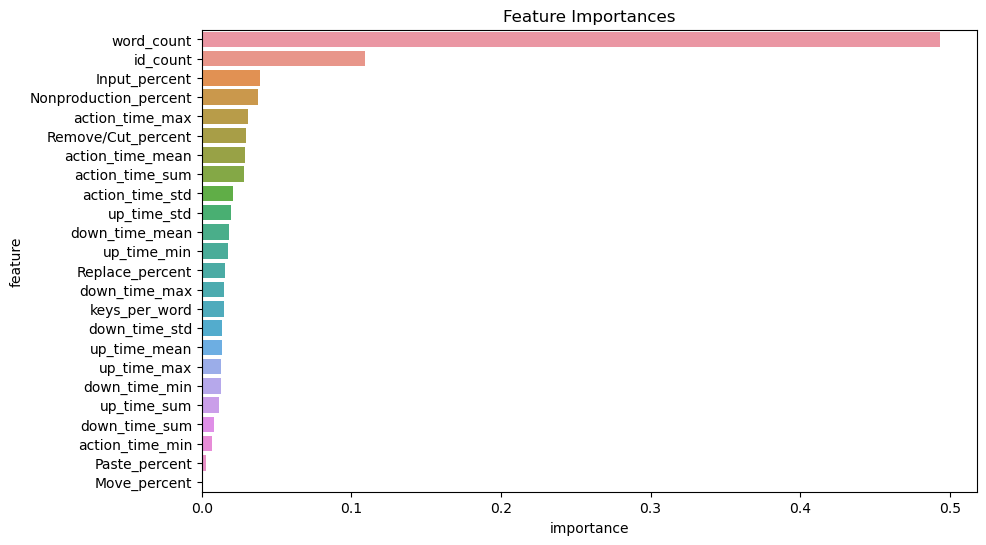

In [117]:
# visualize feature importances
importances = pd.DataFrame({'feature': features.drop(['id', 'score'], axis=1).columns,
                            'importance': dt.feature_importances_}).sort_values('importance', ascending=False)

# plot importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x='importance', y='feature', data=importances);

In [120]:
# look at max depth of tree
dt.get_depth()

24

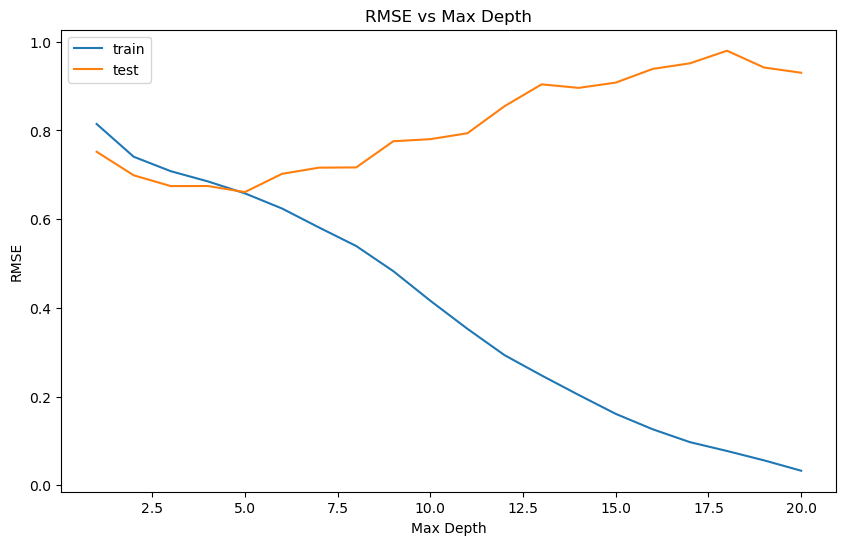

In [122]:
# plot train and test rmse for depths 1-20
train_rmse = []
test_rmse = []

for i in range(1, 21):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    train_rmse.append(mean_squared_error(y_train, dt.predict(X_train), squared=False))
    test_rmse.append(mean_squared_error(y_test, dt.predict(X_test), squared=False))

plt.figure(figsize=(10, 6))
plt.title('RMSE vs Max Depth')
plt.plot(range(1, 21), train_rmse, label='train')
plt.plot(range(1, 21), test_rmse, label='test')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.legend();


In [123]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.5916179076893884, 0.5445334539768479)

In [124]:
mean_squared_error(y_train, dt.predict(X_train), squared=False), mean_squared_error(y_test, dt.predict(X_test), squared=False)

(0.6581697167178641, 0.6590142921589233)

- Dt with dpeth=5 gives test RMSE of 0.66. This beats the LinReg.

# Random Forest

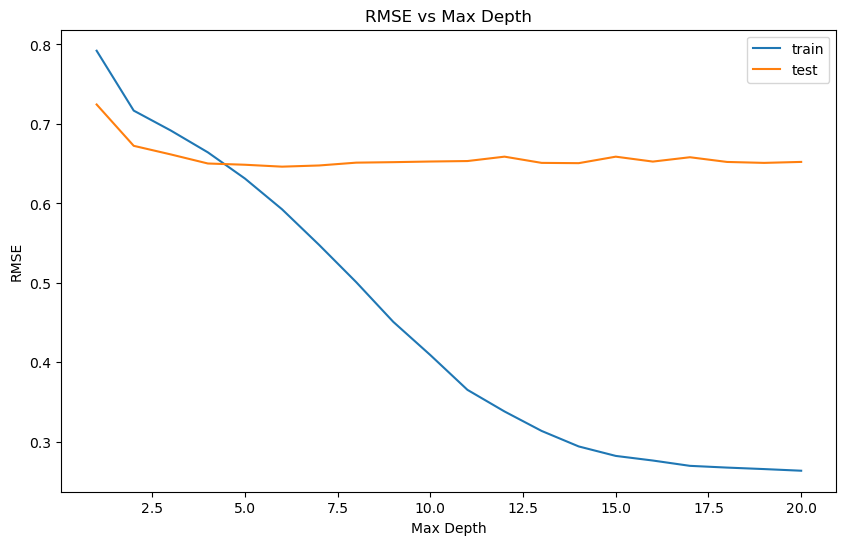

In [125]:
from sklearn.ensemble import RandomForestRegressor

# repeat for random forest
train_rmse = []
test_rmse = []

for i in range(1, 21):
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(X_train, y_train)
    train_rmse.append(mean_squared_error(y_train, rf.predict(X_train), squared=False))
    test_rmse.append(mean_squared_error(y_test, rf.predict(X_test), squared=False))

plt.figure(figsize=(10, 6))
plt.title('RMSE vs Max Depth')
plt.plot(range(1, 21), train_rmse, label='train')
plt.plot(range(1, 21), test_rmse, label='test')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.legend();

- Comparable to DT but less efficient.

# KNN

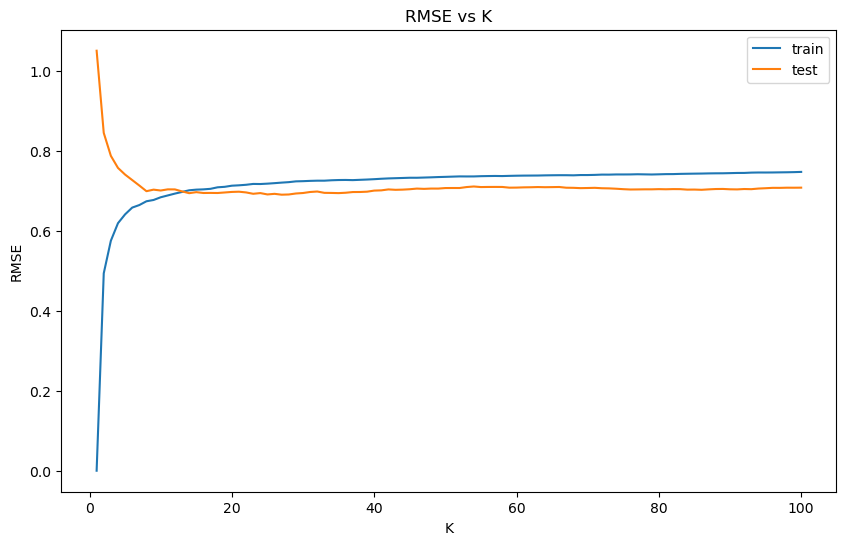

In [129]:
from sklearn.neighbors import KNeighborsRegressor

# k nearest neighbors
train_rmse = []
test_rmse = []

for i in range(1, 101, 1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_rmse.append(mean_squared_error(y_train, knn.predict(X_train), squared=False))
    test_rmse.append(mean_squared_error(y_test, knn.predict(X_test), squared=False))

plt.figure(figsize=(10, 6))
plt.title('RMSE vs K')
plt.plot(range(1, 101, 1), train_rmse, label='train')
plt.plot(range(1, 101, 1), test_rmse, label='test')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend();

In [134]:
np.argmin(test_rmse), np.min(test_rmse)

(26, 0.6911220804435002)

- KNN slightly worse than DT

# XGBoost

In [158]:
from xgboost import XGBRegressor

# xgboost
xgb = XGBRegressor(n_estimators=10000, learning_rate=0.001, n_jobs=-1)
xgb.fit(X_train, y_train)

xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.9113442670958216, 0.5455224702736102)

In [159]:
mean_squared_error(y_train, xgb.predict(X_train), squared=False), mean_squared_error(y_test, xgb.predict(X_test), squared=False)

(0.30666058738952723, 0.6582983997542508)

# PyTorch

In [135]:
# import pytorch packages
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW

In [141]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [143]:
# create a tensor from the numpy array
X_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).float().to(device)

X_test_tensor = torch.from_numpy(X_test).float().to(device)
y_test_tensor = torch.from_numpy(y_test.values).float().to(device)

# create a dataset and dataloader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32)

In [146]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([2223, 24]), torch.Size([2223]))

In [147]:
# create a neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(24, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # activation function
        x = F.relu(self.fc2(x))  # activation function
        x = self.fc3(x)
        return x

In [152]:
# train the model
# train the model
net = Net().to(device)
criterion = nn.MSELoss()
optimizer = AdamW(net.parameters(), lr=0.001)


In [153]:
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    # train
    net.train()
    train_batch_losses = []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = net(X_batch).squeeze(1)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_batch_losses.append(loss.item())
    train_rmse = np.sqrt(np.mean(train_batch_losses))
    train_losses.append(train_rmse)

    # test
    net.eval()
    with torch.inference_mode():
        test_batch_losses = []
        for X_batch, y_batch in test_loader:
            y_pred = net(X_batch).squeeze(1)
            loss = criterion(y_pred, y_batch)
            test_batch_losses.append(loss.item())
        test_rmse = np.sqrt(np.mean(test_batch_losses))
        test_losses.append(test_rmse)

    print(f'Epoch {epoch + 1}, train RMSE: {train_losses[-1]}, test RMSE: {test_losses[-1]}')

Epoch 1, train RMSE: 2.991109905402123, test RMSE: 1.7517708903681641
Epoch 2, train RMSE: 1.6319379379538268, test RMSE: 1.3482408223206728
Epoch 3, train RMSE: 1.277188514885877, test RMSE: 1.1479590613082358
Epoch 4, train RMSE: 1.0538766592004842, test RMSE: 0.963495041604094
Epoch 5, train RMSE: 0.8987776509246891, test RMSE: 0.8225832821654182
Epoch 6, train RMSE: 0.8061865017473582, test RMSE: 0.7361723282213586
Epoch 7, train RMSE: 0.7520253624127547, test RMSE: 0.6948429702941418
Epoch 8, train RMSE: 0.7264487553994908, test RMSE: 0.6795349607631669
Epoch 9, train RMSE: 0.7142557630901082, test RMSE: 0.6747283809595178
Epoch 10, train RMSE: 0.7075020898615277, test RMSE: 0.6699128831532428
Epoch 11, train RMSE: 0.7015757947554746, test RMSE: 0.6707571400046617
Epoch 12, train RMSE: 0.7015812437434344, test RMSE: 0.66386885343984
Epoch 13, train RMSE: 0.6990767627807749, test RMSE: 0.6739048292205643
Epoch 14, train RMSE: 0.7068417646733848, test RMSE: 0.6622908689496697
Epoch 